Latar Belakang dari Dataset Penjualan Mobil :
- Keterkaitan Fitur Mobil: Menyediakan informasi tentang hubungan antara berbagai fitur mobil, seperti model, tahun keluaran, daya kuda (hp), berat, dan
  harga. Hal ini dapat membantu mengidentifikasi pola atau korelasi yang dapat digunakan untuk pengambilan keputusan lebih lanjut.
- Pemahaman Variabilitas Harga: Memberikan wawasan tentang variasi harga mobil berdasarkan atribut-atribut tertentu. Ini dapat melibatkan penelusuran
  perbedaan harga antara mobil dengan spesifikasi yang serupa atau pengidentifikasian faktor-faktor utama yang mempengaruhi harga.

Tujuan dari Dataset Penjualan Mobil :
- Melakukan analisis tren harga mobil berdasarkan model dan tahun keluaran. Dengan melihat perubahan harga rata-rata tiap model mobil sepanjang
  beberapa tahun, Anda bisa mempelajari bagaimana harga mobil cenderung berubah seiring waktu. 
- Memvisualisasikan data untuk melihat distribusi dan perbandingan harga mobil berdasarkan model, tahun, dan spesifikasi lainnya.

In [ ]:
import mysql.connector
import sys

try:
    conn = mysql.connector.connect(
        user='root',
        password='',
        host='localhost',
        database='car_price',
        port=3306
    )

except mysql.connector.Error as e:
    print('Error %s' % e)
    
else:
    print('Berhasil Terkoneksi dengan MySQL server')
    conn.close()

In [ ]:
import mysql.connector
import sys

try:
    conn = mysql.connector.connect(
        user='root',
        password='',
        host='localhost', 
        database='car_price',
        port=3306
    )

    sql = "SELECT `Car Make`, `Car Model`, `Year`, `Engine Size (L)`, `Horsepower`, `Torque (lb-ft)`, `0-60 MPH Time (seconds)`, `Price (in USD)` FROM sport_car_price"
    
    try:
        cur = conn.cursor()
        cur.execute(sql)
            
        results = cur.fetchall()
        
        print("{:<15}{:<25}{:<10}{:<15}{:<15}{:<15}{:<15}{:<10}".format('Car Make','Car Model','Year','Engine Size','Horsepower','Torque','0-60 MPH','Price'))
        
        for row in results:
            car_make = row[0]
            car_model = row[1] 
            year = row[2]
            engine_size = row[3]
            horsepower = row[4]
            torque = row[5]
            zero_to_60 = row[6] 
            price = row[7]

            print("{:<15}{:<25}{:<10}{:<15}{:<15}{:<15}{:<15}{:<10}".format(car_make,car_model,year,engine_size,horsepower,torque,zero_to_60,price))

                            
    except mysql.connector.DataError:
        print("Pengambilan data error")
        
    else:
        cur.close()
        
except mysql.connector.Error as e:
    print('Gagal koneksi ke MySQL: %s' % e)

else:
    print('Berhasil koneksi ke MySQL')
    conn.close()

EKSPLORASI DATA:

- Menambahkan kolom country (asal negara tiap merek)
- Memeriksa jumlah baris dan kolom
- Menampilkan data teratas
- Menampilkan tipe data tiap kolom
- Memeriksa missing value / data kosong pada setiap kolom 

In [ ]:
import mysql.connector 
from sqlalchemy import create_engine
import pandas as pd

try:
    conn = mysql.connector.connect(
        user='root',
        password='', 
        host='localhost',
        database='car_price' 
  )
  
    sql = "SELECT * FROM sport_car_price"

    cur = conn.cursor()
    cur.execute(sql)

    results = cur.fetchall()

    df = pd.DataFrame(results, columns=[col[0] for col in cur.description])

    df['Country'] = df['Car Make'].apply(lambda nama: {
        'Porsche': 'Jerman',
        'Lamborghini': 'Italia',
        'Ferrari': 'Italia',
        'Audi': 'Jerman',
        'McLaren': 'Inggris',
        'BMW': 'Jerman',
        'Mercedes-Benz': 'Jerman',
        'Mercedes-AMG': 'Jerman',
        'Chevrolet': 'Amerika',
        'Ford': 'Amerika',
        'Nissan': 'Jepang',
        'Aston Martin': 'Inggris',
        'Bugatti': 'Prancis',
        'Dodge': 'Amerika',
        'Jaguar': 'Inggris',
        'Koenigsegg': 'Swedia',
        'Lexus': 'Jepang',
        'Lotus': 'Inggris',
        'Maserati': 'Italia',
        'Pagani': 'Italia',
        'Rimac': 'Kroasia',
        'Rolls-Royce': 'Inggris',
        'Tesla': 'Amerika',
        'Toyota': 'Jepang',
        'TVR': 'Inggris',
        'Ultima': 'Inggris',
        'W Motors': 'Lebanon',
        'Alpine': 'Prancis',
        'Alfa Romeo': 'Italia',
        'Bentley': 'Inggris',
        'Subaru': 'Jepang',
        'Acura': 'Jepang',
        'Ariel': 'Inggris',
        'Kia': 'Korea Selatan',
        'Pininfarina': 'Italia',
        'Shelby': 'Amerika',
        'Mazda': 'Jepang',
    }.get(nama, 'Tidak Diketahui'))

    engine = create_engine('mysql+mysqlconnector://root:@localhost/car_price')
    df.to_sql(name='sport_car_price_updated', con=engine, if_exists='replace', index=False)
    
    baris, kolom = df.shape
    print(f"Data frame memiliki {baris} baris dan {kolom} kolom\n")
    
    jumlah_data_teratas = df.head().to_string(index=False) 
    print(f"Jumlah data teratas:\n{jumlah_data_teratas}\n")
    
    tipe_data = df.dtypes
    print(f"Tipe data setiap kolom:\n{tipe_data}\n")
    
    data_kosong = df.isnull().sum().sum()
    print(f"Jumlah Data kosong pada setiap kolom:{data_kosong}\n")
    
    
except mysql.connector.Error as e:
  print("Error %s" % e)
  
finally:
    if 'conn' in locals() and conn.is_connected():
        conn.close()
        print('Berhasil terkoneksi dengan MySQL server')

DATA CLEANING:

- Cek Outlier 
- Visualisasi Distribusi pada setiap kolom

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

try:
    conn = mysql.connector.connect(
    user='root',
    password='', 
    host='localhost',
    database='car_price' 
  )
  
    sql = "SELECT * FROM sport_car_price_updated"

    cur = conn.cursor()
    cur.execute(sql)

    results = cur.fetchall()

    df = pd.DataFrame(results, columns=[col[0] for col in cur.description])
    
    z = np.abs(stats.zscore(df._get_numeric_data()))
    df = df[(z < 3).all(axis=1)]
    print(df.to_string(index=False))
   
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Distribusi dari {col}')
    
    plt.tight_layout()
    plt.show()
      
    
except mysql.connector.Error as e:
  print("Error %s" % e)
  
finally:
  conn.close()
  print('Berhasil terkoneksi dengan MySQL server')

ANALISIS DATA:

- Analisis tren harga mobil berdasarkan model dan tahun keluaran

In [10]:
import mysql.connector
import sys
import pandas as pd

try:
    conn = mysql.connector.connect(
        user='root',
        password='',
        host='localhost', 
        database='car_price',
        port=3306
    )

    sql = "SELECT * FROM sport_car_price_updated WHERE `Car Make` = 'Porsche' AND `Car Model` = 'Cayman' "
    
    try:
        cur = conn.cursor()
        cur.execute(sql)
            
        results = cur.fetchall()
    
        df = pd.DataFrame(results, columns=[col[0] for col in cur.description])
        
        df['Price (in USD)'] = df['Price (in USD)'].str.replace(',','').astype(float) # konversi tipe data dari object ke float
        
        grouped = df.groupby(['Car Make','Car Model', 'Year'])['Price (in USD)'].mean().reset_index()
        
        print(grouped.sort_values("Car Model"))
                            
    except mysql.connector.DataError:
        print("Pengambilan data error")
        
    else:
        cur.close()
        
except mysql.connector.Error as e:
    print('Gagal koneksi ke MySQL: %s' % e)

else:
    print('Berhasil koneksi ke MySQL')
    conn.close()

  Car Make Car Model  Year  Price (in USD)
0  Porsche    Cayman  2021         59400.0
1  Porsche    Cayman  2022         63320.0
Berhasil koneksi ke MySQL


VISUALISASI:
- Memvisualisasikan data untuk melihat distribusi dan perbandingan harga mobil berdasarkan model, tahun, dan spesifikasi lainnya.

Berhasil koneksi ke MySQL


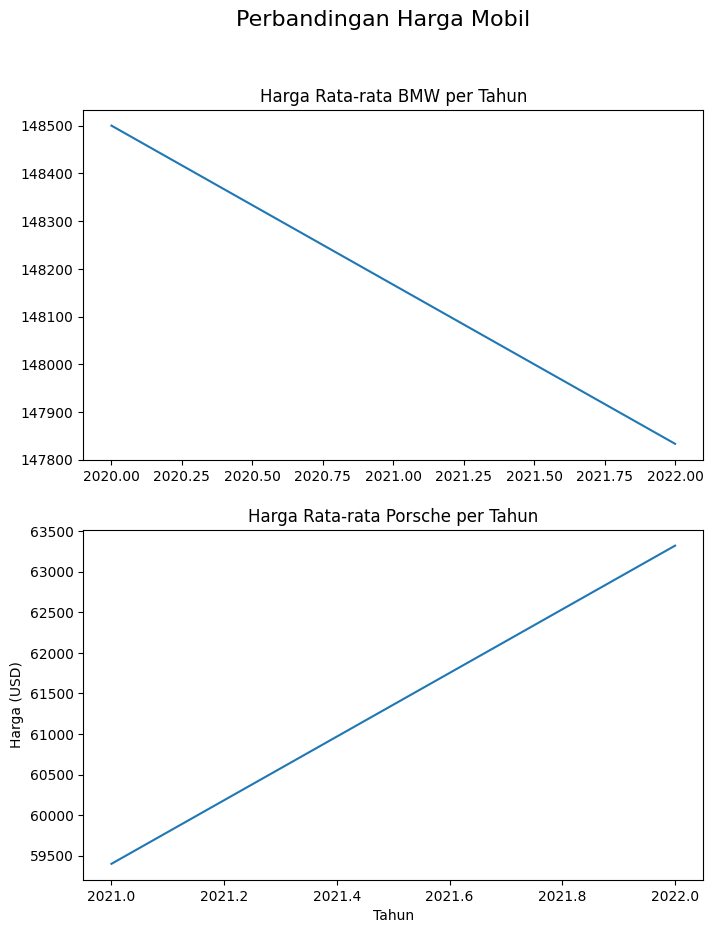

In [20]:
import mysql.connector
import sys
import matplotlib.pyplot as plt

try:
    conn = mysql.connector.connect(
        user='root',
        password='',
        host='localhost', 
        database='car_price',
        port=3306
    )

    sql = "SELECT * FROM sport_car_price_updated"
    
    try:
        cur = conn.cursor()
        cur.execute(sql)
            
        results = cur.fetchall()
    
        df = pd.DataFrame(results, columns=[col[0] for col in cur.description])
        
        df['Price (in USD)'] = df['Price (in USD)'].str.replace(',','').astype(float) # konversi tipe data dari object ke float
        
        mean_bmw = df_bmw.groupby('Year')['Price (in USD)'].mean()
        mean_porsche = df_porsche.groupby('Year')['Price (in USD)'].mean()
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
        ax1.plot(df_bmw.groupby('Year')['Price (in USD)'].mean())
        ax1.set_title('Harga Rata-rata BMW per Tahun')
        ax2.plot(df_porsche.groupby('Year')['Price (in USD)'].mean())
        ax2.set_title('Harga Rata-rata Porsche per Tahun')
        fig.suptitle('Perbandingan Harga Mobil', fontsize=16)
        plt.xlabel('Tahun')
        plt.ylabel('Harga (USD)')
                                    
    except mysql.connector.DataError:
        print("Pengambilan data error")
        
    else:
        cur.close()
        
except mysql.connector.Error as e:
    print('Gagal koneksi ke MySQL: %s' % e)

else:
    print('Berhasil koneksi ke MySQL')
    conn.close()